In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
from sklearn import linear_model
data=pd.read_csv(r'C:\Users\Mike\Desktop\histretSP.cleaned.csv')

In [131]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [132]:
xls=pd.ExcelFile('histretSP.cleaned.xls')
RBY = pd.read_excel(xls, 'Returns by year', header=0, index_col=False, keep_default_na=True)
Tbill = pd.read_excel(xls, 'T. Bill rates')
SP500raw = pd.read_excel(xls, 'S&P 500 & Raw Data')
Tbond = pd.read_excel(xls, 'T. Bond return')

RBY.columns = RBY.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('&', '').str.replace('.', '').str.replace('_', '').str.replace('-', '').str.replace('3', 'three').str.replace('10', 'ten')

for col in RBY.columns: 
    print(col)

year
sp500includesdividends
threemonthtbill
returnontenyeartbond
stocks
tbills
tbonds
stocksbills
stocksbonds
historicalriskpremium
inflationrate
sp500includesdividends2
threemonthtbillreal
tenyeartbonds


# Boxplots

In [155]:
# function to calculate outlier cutoff values

# x is the 25% value
# y is the 75% value

def cutoff(x, y):
    z=y-x
    z=z*1.5
    print(x-z)
    print(y+z)

In [156]:
RBY.describe(include="all")

,year,sp500includesdividends,threemonthtbill,returnontenyeartbond,stocks,tbills,tbonds,stocksbills,stocksbonds,historicalriskpremium,inflationrate,sp500includesdividends2,threemonthtbillreal,tenyeartbonds
count,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1973.00000,0.113563,0.034256,0.050970,52883.836118,700.789959,1655.366008,0.079307,0.062592,0.038257,7.133799,-0.753778,-0.771016,-0.765534
std,26.41338,0.195815,0.030400,0.076994,91627.632749,708.196449,2234.532904,0.198958,0.211943,0.060232,5.963328,0.177450,0.159559,0.167487
min,1928.00000,-0.438375,0.000250,-0.111167,50.664911,103.080000,100.835471,-0.461475,-0.566536,-0.158062,1.000000,-0.967103,-0.951485,-0.951054
25%,1950.50000,-0.011984,0.009612,0.008776,397.696755,125.262572,198.978290,-0.032951,-0.092259,0.037241,1.677675,-0.905529,-0.910728,-0.910001
50%,1973.00000,0.135244,0.030450,0.032746,4080.444016,272.162424,372.571132,0.095153,0.078464,0.049719,5.998780,-0.846080,-0.847509,-0.849553
75%,1995.50000,0.244462,0.050900,0.083433,68850.939047,1276.415707,2495.247674,0.213581,0.200324,0.055214,10.354385,-0.611334,-0.606845,-0.600553
max,2018.00000,0.525633,0.143000,0.328145,399768.635072,2063.403796,7309.873866,0.516008,0.492735,0.429757,19.809920,-0.373640,-0.488150,-0.456720


-0.39665300000000003
0.6291310000000001
-0.05232
0.112832
-0.10320949999999998
0.1954185
-102282.16668300002
171530.80248500002
-1601.4671305
3003.1454095
-3245.4257860000002
5939.651750000001


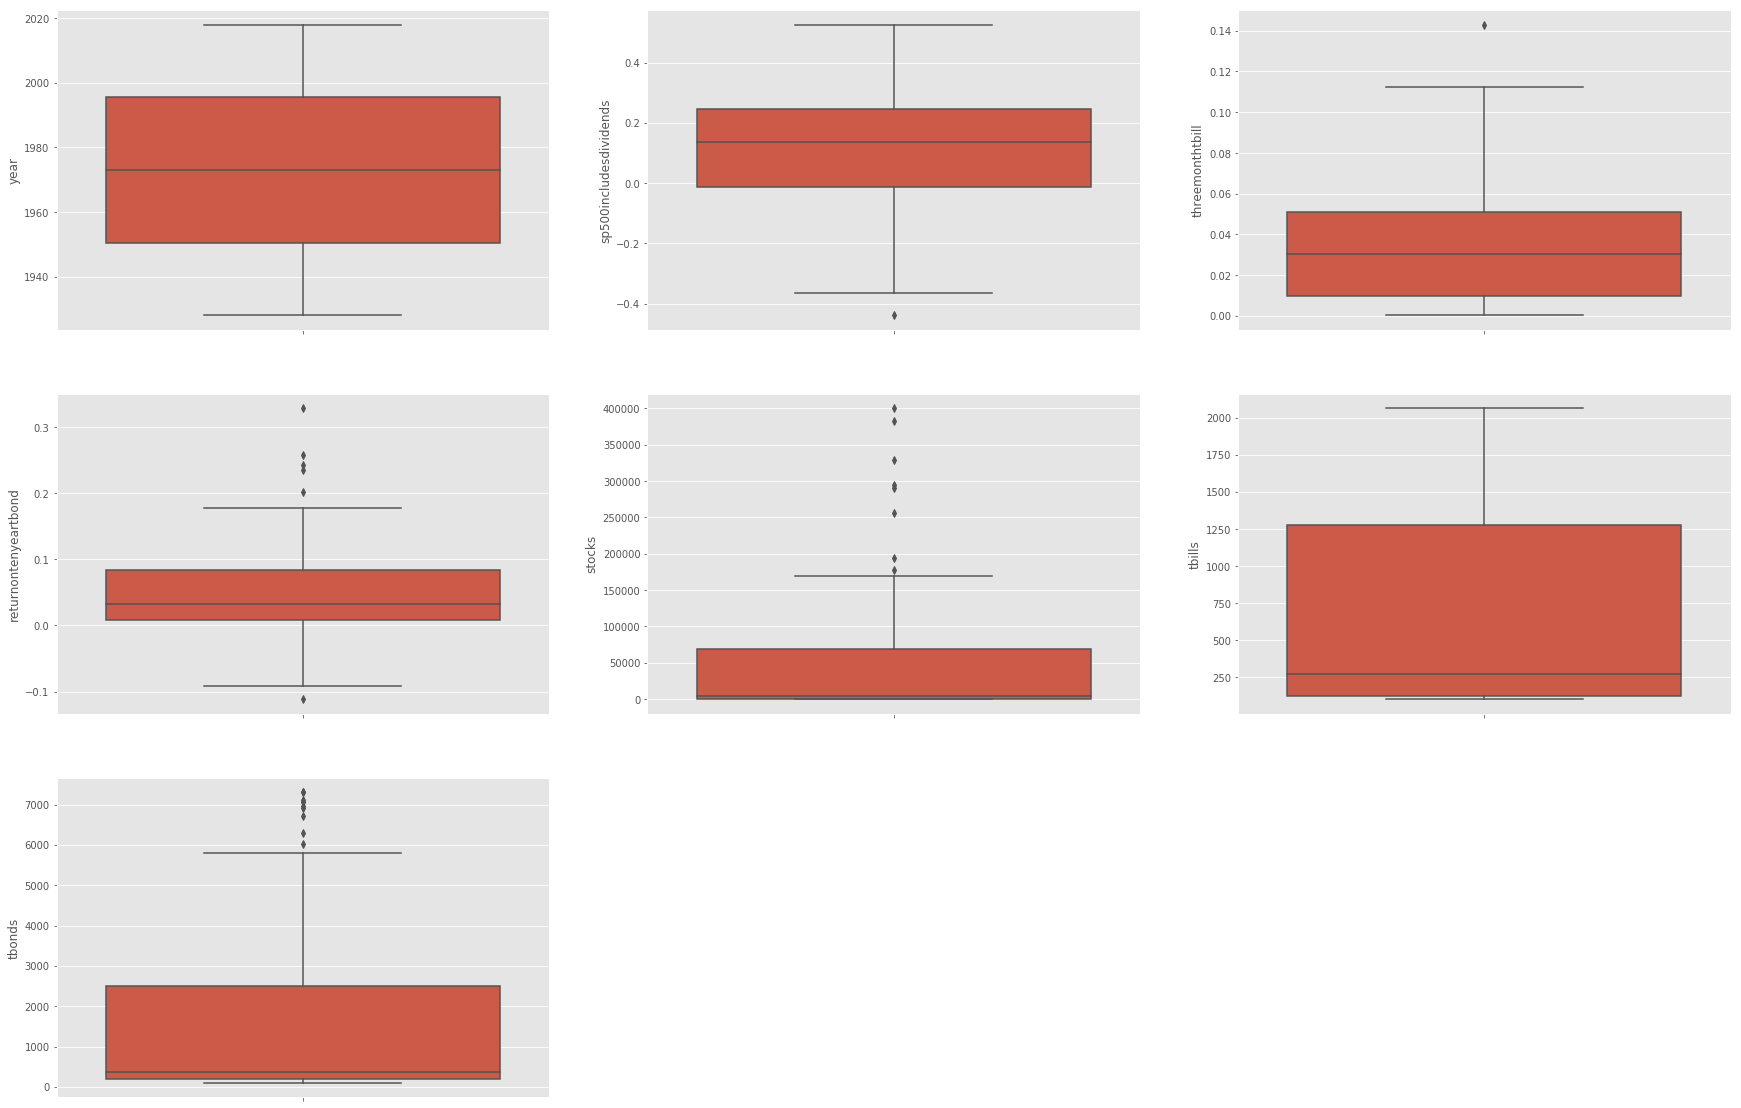

In [157]:
fig = plt.figure(figsize=(30,20));

fig.add_subplot(3,3,1)
sns.boxplot(RBY.year, orient='v');

fig.add_subplot(3,3,2)
sns.boxplot(RBY.sp500includesdividends, orient='v');
cutoff(-0.011984,0.244462)
# outliers are <-0.3967 and >0.6291

fig.add_subplot(3,3,3)
sns.boxplot(RBY.threemonthtbill, orient='v');
cutoff(.009612,.0509)
# outliers are <-0.05232 and >0.11283

fig.add_subplot(3,3,4)
sns.boxplot(RBY.returnontenyeartbond, orient='v');
cutoff(.008776,.083433)
# outliers are <-0.1032 and >0.1954

fig.add_subplot(3,3,5)
sns.boxplot(RBY.stocks, orient='v');
cutoff(397.696755,68850.939047)
# outliers are <102282.167 and >171530.802

fig.add_subplot(3,3,6)
sns.boxplot(RBY.tbills, orient='v');
cutoff(125.262572,1276.415707)
# outliers are <-1601.467 and >3003.145

fig.add_subplot(3,3,7)
sns.boxplot(RBY.tbonds, orient='v');
cutoff(198.978290,2495.247674);
# outliers are <-3245.426 and >5939.652

-0.402749
0.583379
-0.5311334999999999
0.6391985
0.01028150000000001
0.0821735
-11.3380875
23.3706125
-1.3468215
-0.17004150000000007
-1.3665525
-0.15102049999999995
-1.3741729999999999
-0.13638100000000009


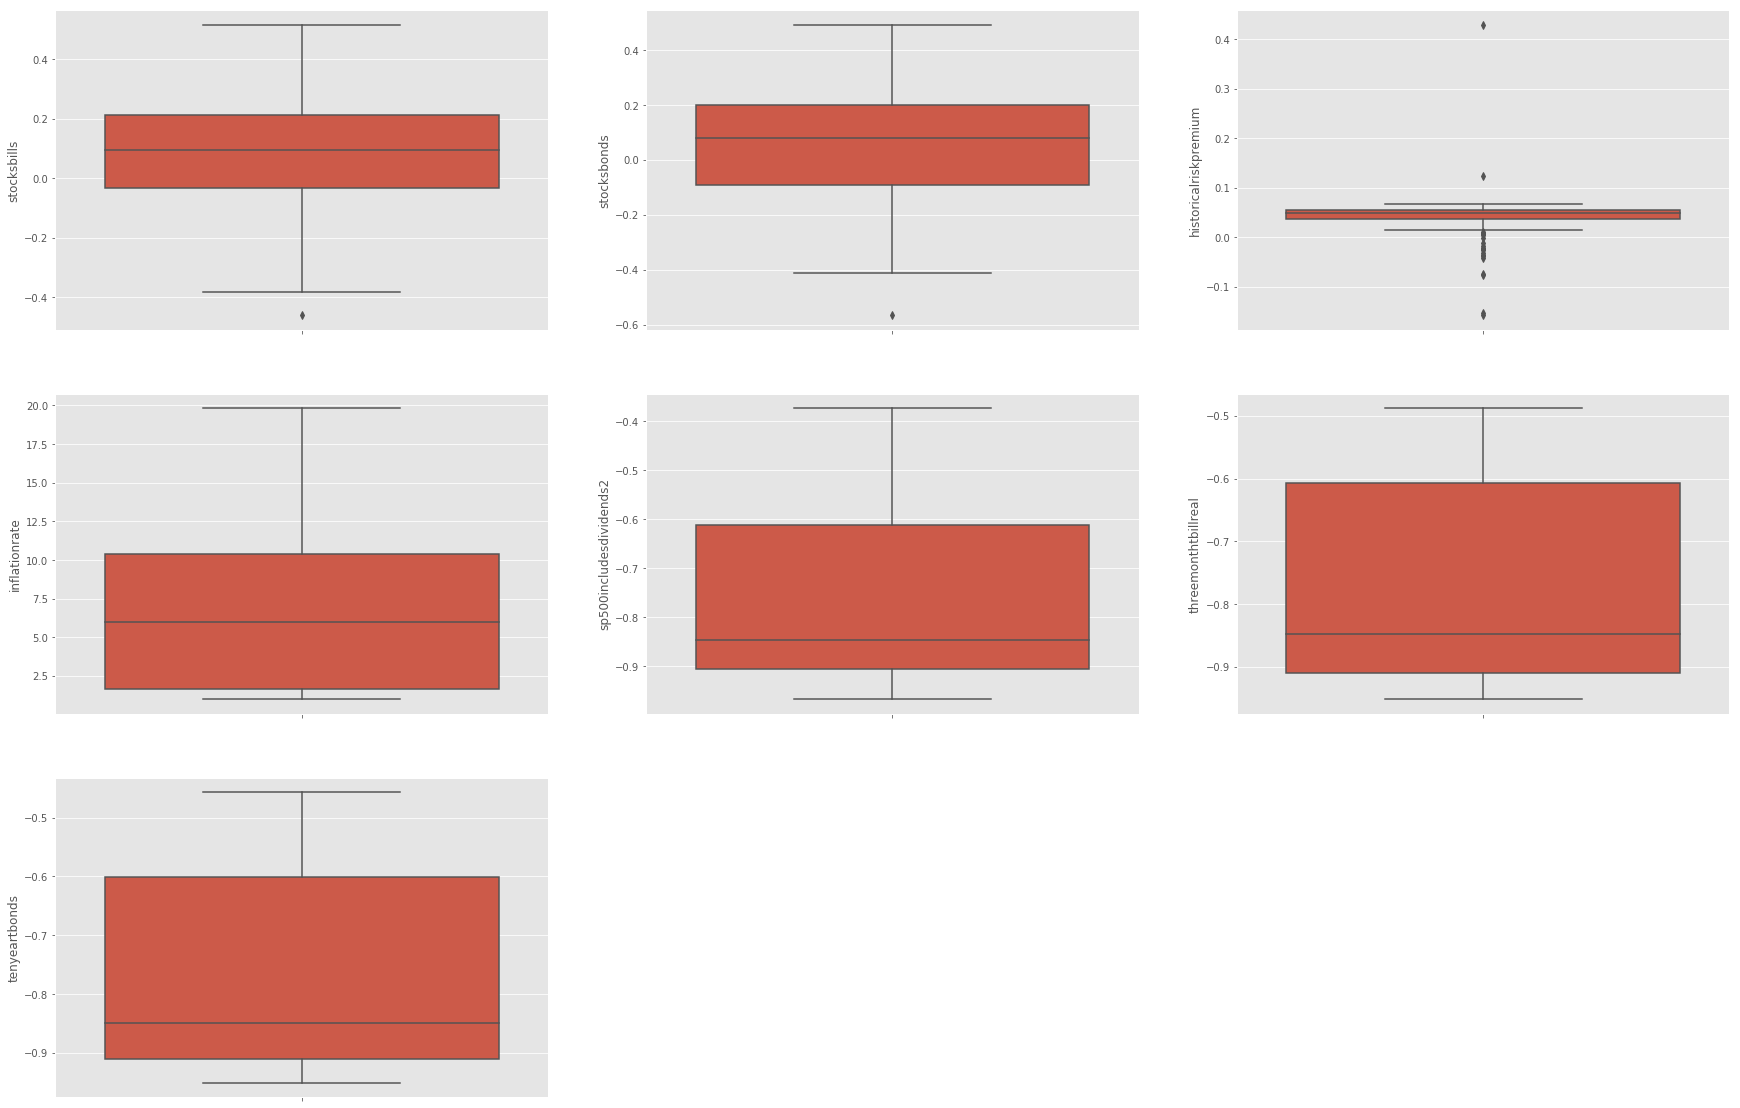

In [158]:
fig = plt.figure(figsize=(30,20));

fig.add_subplot(3,3,1)
sns.boxplot(RBY.stocksbills, orient='v');
cutoff(-.032951,.213581)
# outliers are <-0.4027 and >0.5834

fig.add_subplot(3,3,2)
sns.boxplot(RBY.stocksbonds, orient='v');
cutoff(-.092259,.200324)
# outliers are <-0.5311 and >0.6392

fig.add_subplot(3,3,3)
sns.boxplot(RBY.historicalriskpremium, orient='v');
cutoff(.037241,.055214)
# outliers are <0.0103 and >0.0821

fig.add_subplot(3,3,4)
sns.boxplot(RBY.inflationrate, orient='v');
cutoff(1.677675,10.35485)
# outliers are <-11.3381 and >23.3706

fig.add_subplot(3,3,5)
sns.boxplot(RBY.sp500includesdividends2, orient='v');
cutoff(-.905529,-.611334)
# outliers are <-1.3468 and >-0.1700

fig.add_subplot(3,3,6)
sns.boxplot(RBY.threemonthtbillreal, orient='v');
cutoff(-.910728,-.606845)
# outliers are <-1.3665 and >-0.1510

fig.add_subplot(3,3,7)
sns.boxplot(RBY.tenyeartbonds, orient='v');
cutoff(-.910001,-.600553);
# outliers are <-1.3742 and >-0.1364

# Regressions

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213b9ded780>)

0.8989944684291955

310623.2302973903

-11453.207618134693

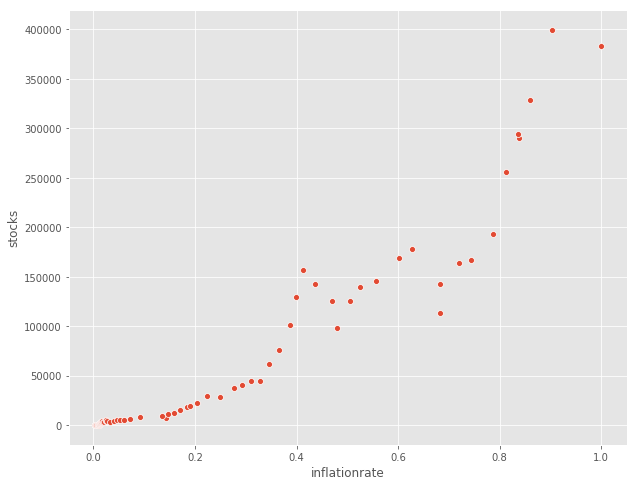

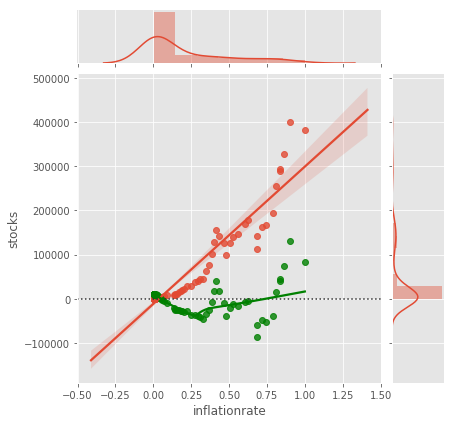

In [175]:
# inflationrate and stocks regression
plt.subplots(figsize = (10,8));

#x=1/(RBY.inflationrate)
x=(1/(RBY.inflationrate)**2)
sns.scatterplot(x=x, y=RBY.stocks);
sns.jointplot(x=x, y=RBY.stocks, kind="reg");
sns.residplot(x=x, y=RBY.stocks, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.stocks)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.899

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213bbed66a0>)

0.9840377149040757

2328.611962529466

-96.07562638821241

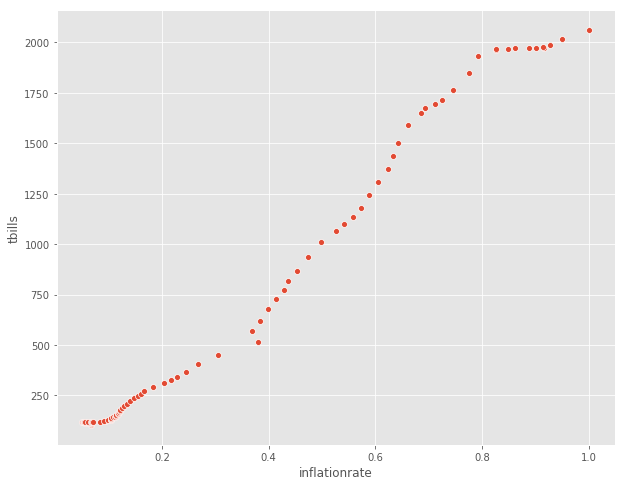

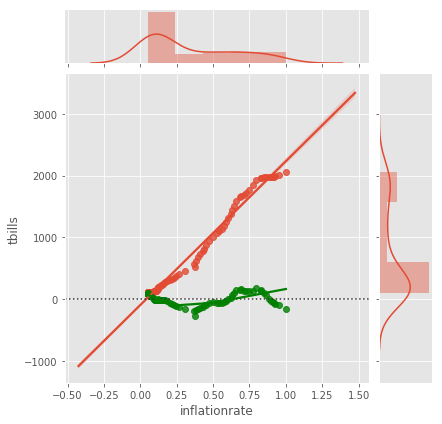

In [178]:
# inflationrate and tbills regression
plt.subplots(figsize = (10,8));

x=1/(RBY.inflationrate)
#x=(1/(RBY.inflationrate)**2)
sns.scatterplot(x=x, y=RBY.tbills);
sns.jointplot(x=x, y=RBY.tbills, kind="reg");
sns.residplot(x=x, y=RBY.tbills, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbills)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.984

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213bc47d0b8>)

0.9850873328340578

7929.632802771573

12.961053816968388

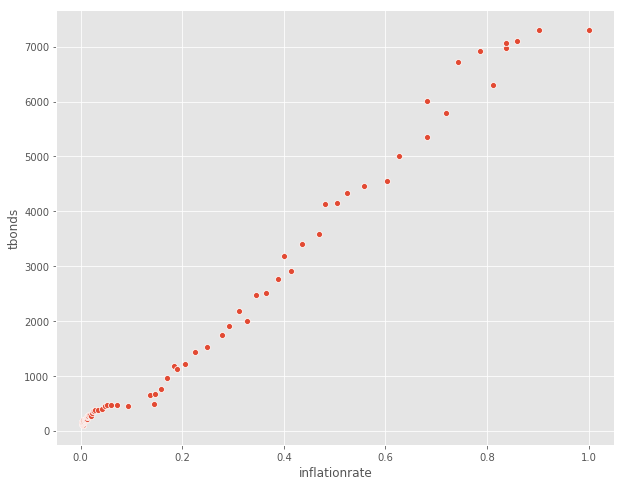

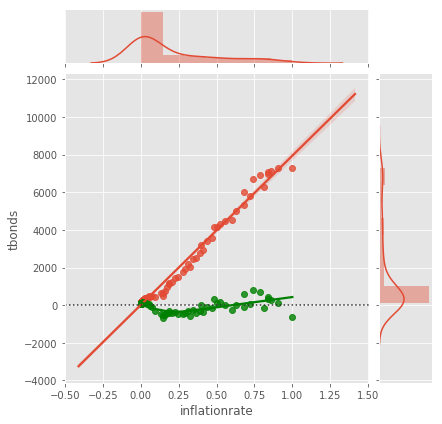

In [181]:
# inflationrate and tbonds regression
plt.subplots(figsize = (10,8));

#x=1/(RBY.inflationrate)
x=(1/(RBY.inflationrate)**2)
sns.scatterplot(x=x, y=RBY.tbonds);
sns.jointplot(x=x, y=RBY.tbonds, kind="reg");
sns.residplot(x=x, y=RBY.tbonds, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbonds)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.985

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213a208d978>)

0.9082535306593414

0.560552133231803

-0.9456024041781711

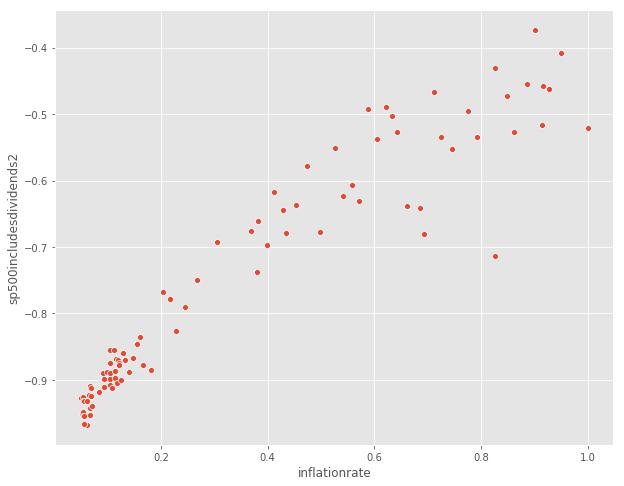

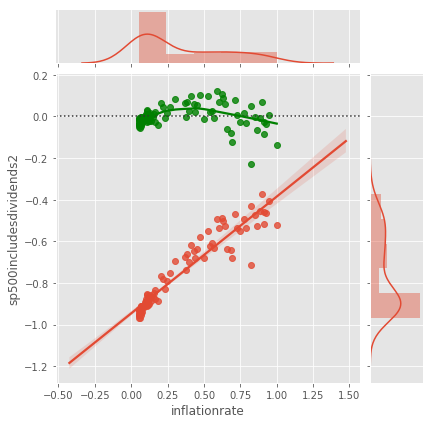

In [184]:
# inflationrate and sp500incudesdividends2 regression
plt.subplots(figsize = (10,8));

x=1/(RBY.inflationrate)
#x=(1/(RBY.inflationrate)**2)
sns.scatterplot(x=x, y=RBY.sp500includesdividends2);
sns.jointplot(x=x, y=RBY.sp500includesdividends2, kind="reg");
sns.residplot(x=x, y=RBY.sp500includesdividends2, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.sp500includesdividends2)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.908

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213b3210128>)

0.9662198470632464

0.5198725130174517

-0.9489196128778292

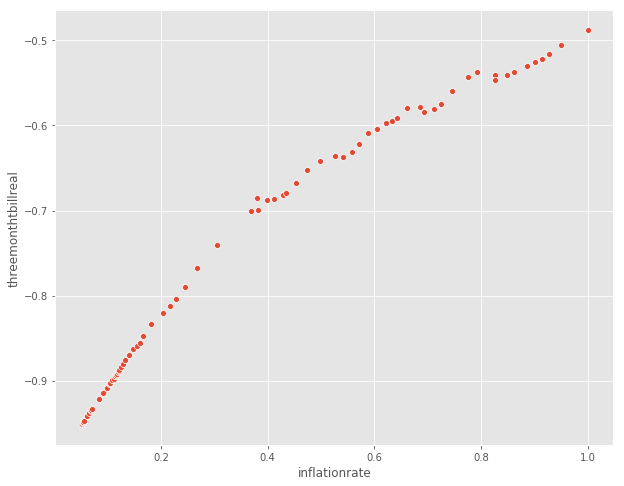

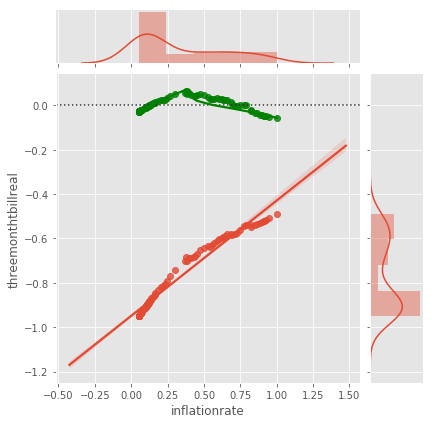

In [187]:
# inflationrate and threemonthtbillreal regression
plt.subplots(figsize = (10,8));

x=1/(RBY.inflationrate)
#x=(1/(RBY.inflationrate)**2)
sns.scatterplot(x=x, y=RBY.threemonthtbillreal);
sns.jointplot(x=x, y=RBY.threemonthtbillreal, kind="reg");
sns.residplot(x=x, y=RBY.threemonthtbillreal, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.threemonthtbillreal)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.966

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2139ee18668>)

0.9464388190537625

0.5400880711105107

-0.9503553736681652

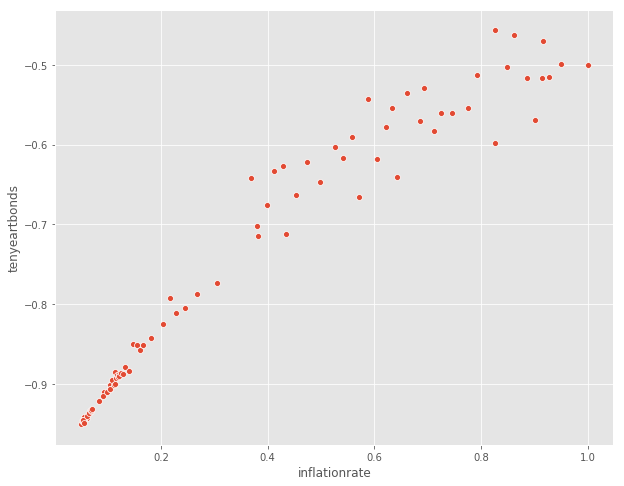

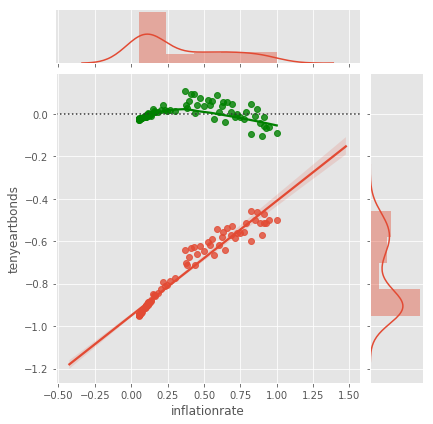

In [190]:
# inflationrate and tenyeartbonds regression
plt.subplots(figsize = (10,8));

x=1/(RBY.inflationrate)
#x=(1/(RBY.inflationrate)**2)
sns.scatterplot(x=x, y=RBY.tenyeartbonds);
sns.jointplot(x=x, y=RBY.tenyeartbonds, kind="reg");
sns.residplot(x=x, y=RBY.tenyeartbonds, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tenyeartbonds)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.946

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213bb17a898>)

0.05488990008320016

0.030021278295638554

0.05285874265161243

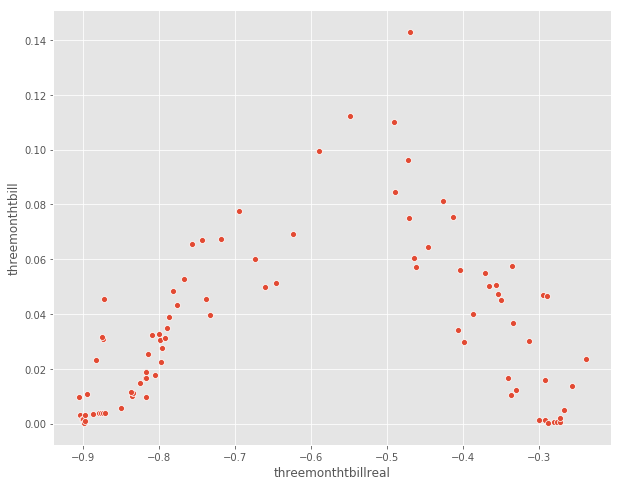

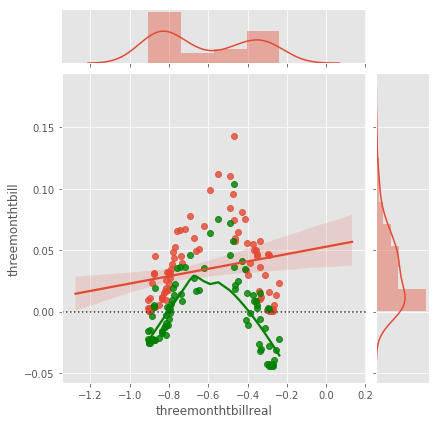

In [199]:
# threemonthtbillreal and threemonthtbill regression
plt.subplots(figsize = (10,8));

x=-(RBY.threemonthtbillreal)**2
sns.scatterplot(x=x, y=RBY.threemonthtbill);
sns.jointplot(x=x, y=RBY.threemonthtbill, kind="reg");
sns.residplot(x=x, y=RBY.threemonthtbill, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.threemonthtbill)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.0548

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213a1457ba8>)

0.04951222044232139

0.02757403380060102

0.05118075585899955

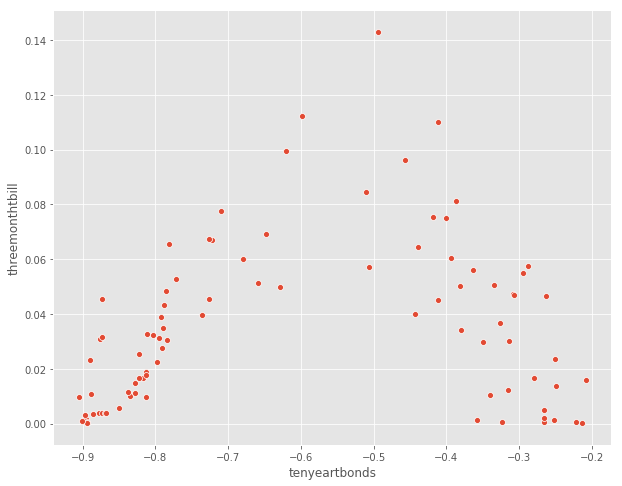

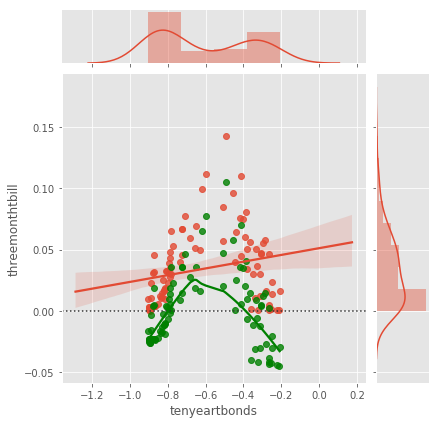

In [202]:
# tenyeartbonds and threemonthtbill regression
plt.subplots(figsize = (10,8));

x=-(RBY.tenyeartbonds)**2
sns.scatterplot(x=x, y=RBY.threemonthtbill);
sns.jointplot(x=x, y=RBY.threemonthtbill, kind="reg");
sns.residplot(x=x, y=RBY.threemonthtbill, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.threemonthtbill)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.0495

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213a42acef0>)

0.9453327980247747

3.9776549979564506

94.32468910602506

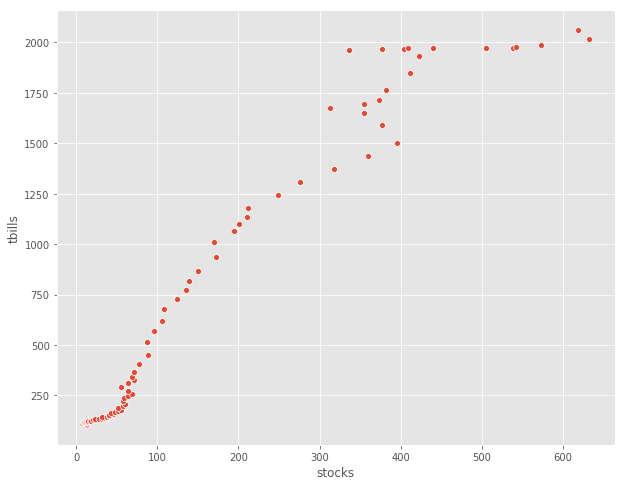

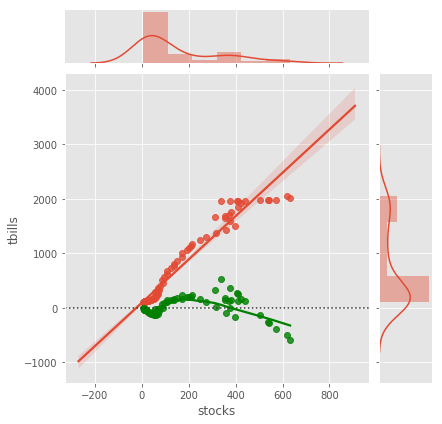

In [209]:
# stocks and tbills regression
plt.subplots(figsize = (10,8));

x=np.sqrt(RBY.stocks)
sns.scatterplot(x=x, y=RBY.tbills);
sns.jointplot(x=x, y=RBY.tbills, kind="reg");
sns.residplot(x=x, y=RBY.tbills, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbills)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.9453

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213bb2af550>)

0.6690325300057747

979510.0116006494

-406014.4380432756

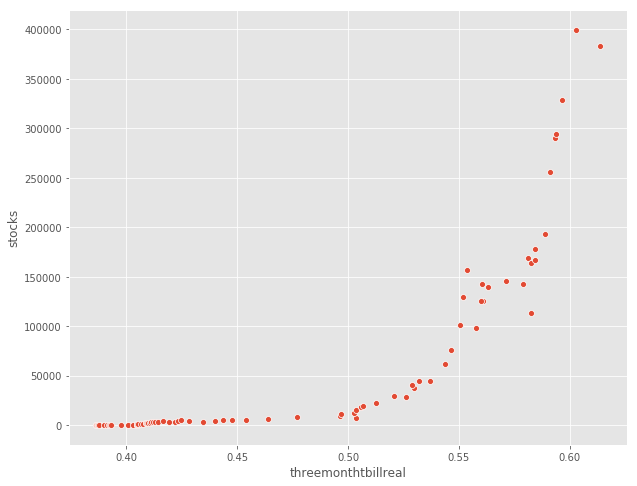

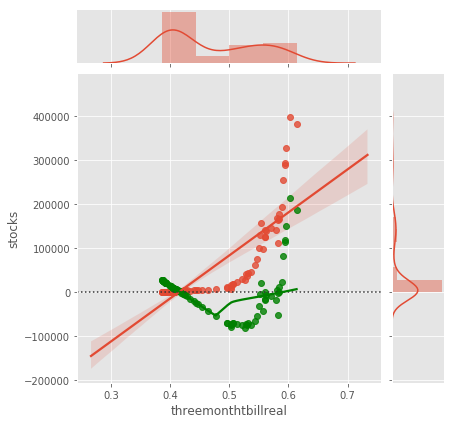

In [244]:
# threemonthtbillreal and stocks regression
plt.subplots(figsize = (10,8));

x=np.exp(RBY.threemonthtbillreal)
sns.scatterplot(x=x, y=RBY.stocks);
sns.jointplot(x=x, y=RBY.stocks, kind="reg");
sns.residplot(x=x, y=RBY.stocks, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.stocks)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.6690

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213b9c15d30>)

0.6264827946727569

891994.7264015998

-367880.1273495017

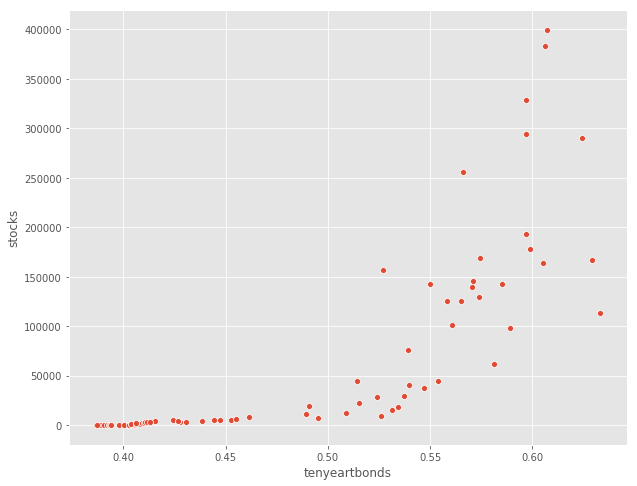

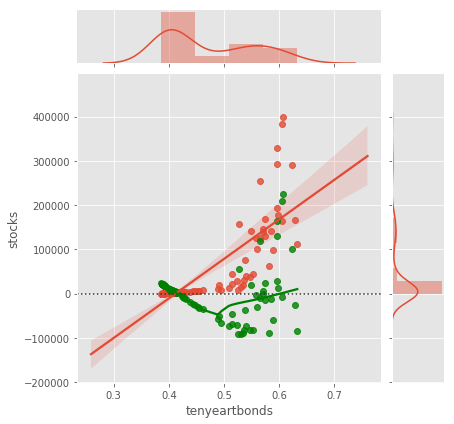

In [243]:
# tenyeartbonds and stocks regression
plt.subplots(figsize = (10,8));

x=np.exp(RBY.tenyeartbonds)
sns.scatterplot(x=x, y=RBY.stocks);
sns.jointplot(x=x, y=RBY.stocks, kind="reg");
sns.residplot(x=x, y=RBY.stocks, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.stocks)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.6265

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213c05300f0>)

0.8724214043452008

7492.8471620146265

-2882.059013461945

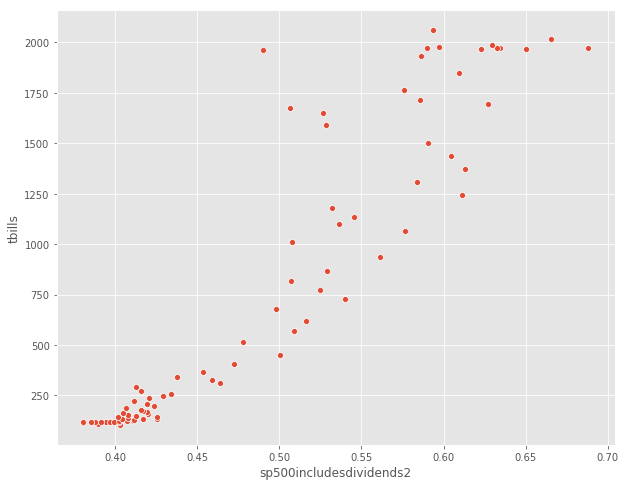

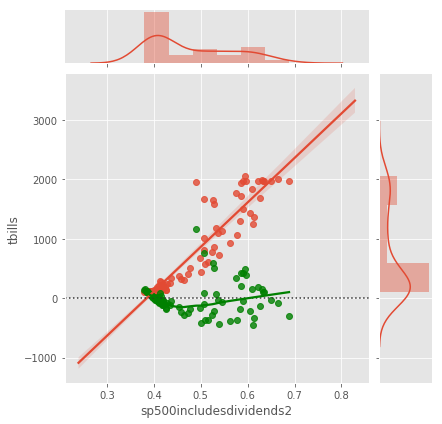

In [252]:
# sp500includesdividends2 and tbills regression
plt.subplots(figsize = (10,8));

x=np.exp(RBY.sp500includesdividends2)
sns.scatterplot(x=x, y=RBY.tbills);
sns.jointplot(x=x, y=RBY.tbills, kind="reg");
sns.residplot(x=x, y=RBY.tbills, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbills)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.8724

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213c0b11b70>)

0.9491829306384216

9017.52801451167

-3523.9019731229255

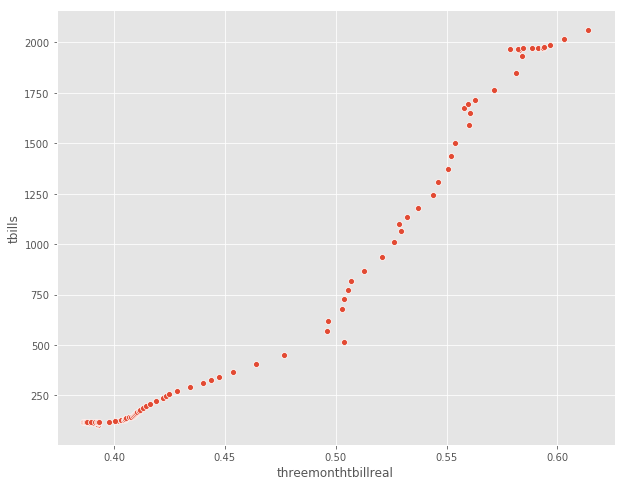

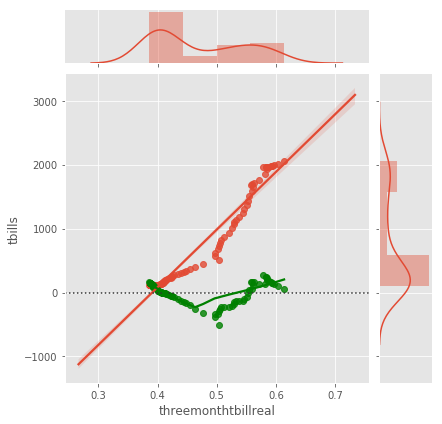

In [254]:
# threemonthtbillreal and tbills regression
plt.subplots(figsize = (10,8));

x=np.exp(RBY.threemonthtbillreal)
sns.scatterplot(x=x, y=RBY.tbills);
sns.jointplot(x=x, y=RBY.tbills, kind="reg");
sns.residplot(x=x, y=RBY.tbills, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbills)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.9492

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213c0e05cc0>)

0.9278231227929643

8390.108689233382

-3256.91885010324

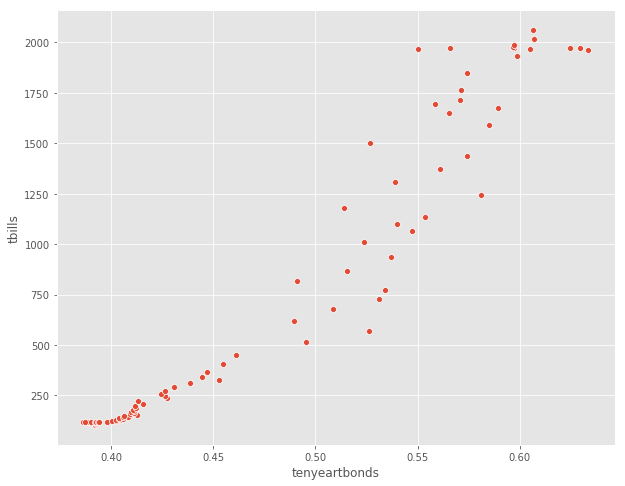

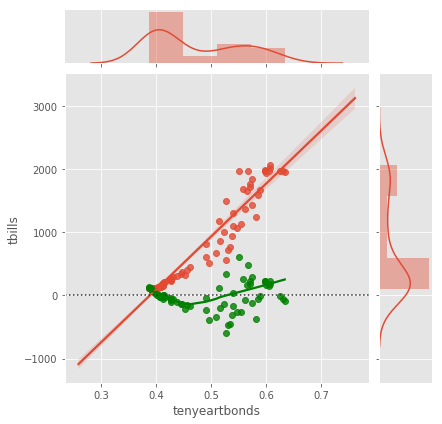

In [255]:
# tenyeartbonds and tbills regression
plt.subplots(figsize = (10,8));

x=np.exp(RBY.tenyeartbonds)
sns.scatterplot(x=x, y=RBY.tbills);
sns.jointplot(x=x, y=RBY.tbills, kind="reg");
sns.residplot(x=x, y=RBY.tbills, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbills)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.9278

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213c2333438>)

0.7389500554939457

21758.265412606946

-8748.767051053303

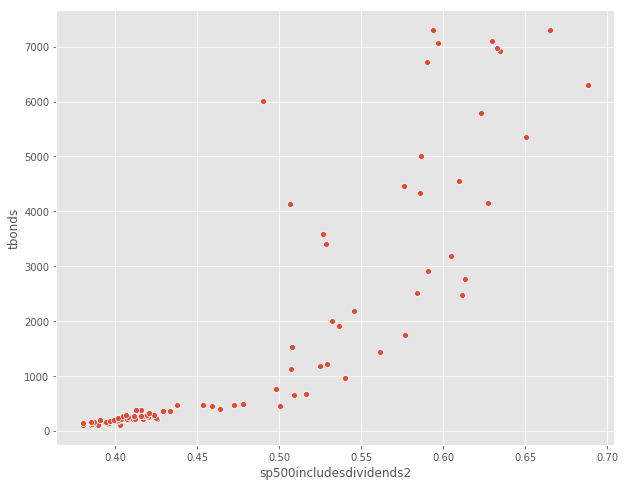

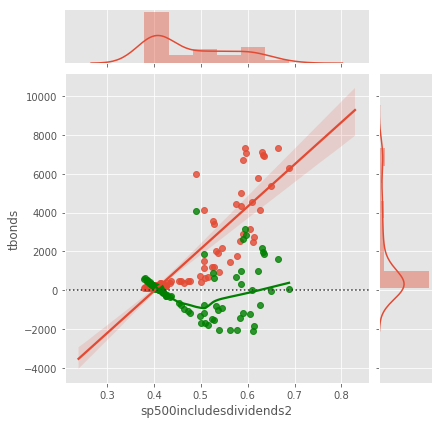

In [257]:
# sp500includesdividends2 and tbonds regression
plt.subplots(figsize = (10,8));

x=np.exp(RBY.sp500includesdividends2)
sns.scatterplot(x=x, y=RBY.tbonds);
sns.jointplot(x=x, y=RBY.tbonds, kind="reg");
sns.residplot(x=x, y=RBY.tbonds, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbonds)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.7389

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213c2626828>)

0.8006790586460376

26132.1284632296

-10587.478383111156

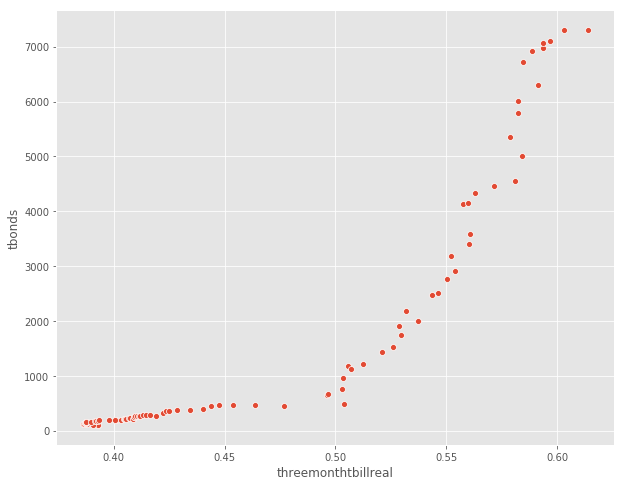

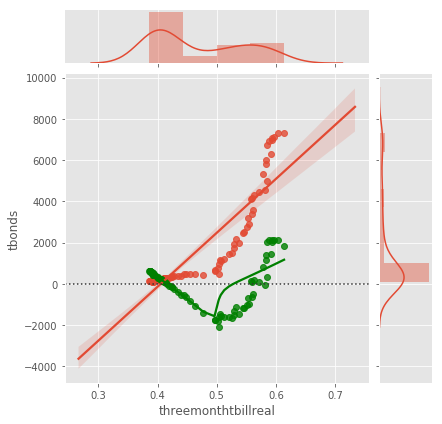

In [259]:
# threemonthtbillreal and tbonds regression
plt.subplots(figsize = (10,8));

x=np.exp(RBY.threemonthtbillreal)
sns.scatterplot(x=x, y=RBY.tbonds);
sns.jointplot(x=x, y=RBY.tbonds, kind="reg");
sns.residplot(x=x, y=RBY.tbonds, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbonds)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.8006

float(lm.coef_)
float(lm.intercept_)

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213c2b7d668>)

0.7865502233458885

24374.248222431994

-9842.241527913164

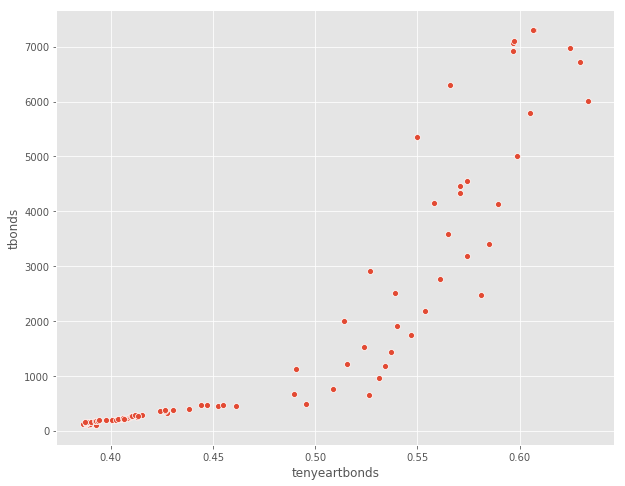

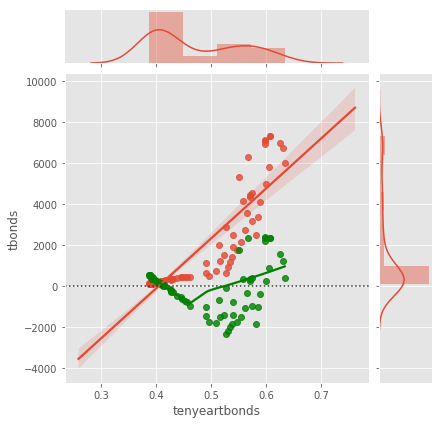

In [260]:
# tenyeartbonds and tbonds regression
plt.subplots(figsize = (10,8));

x=np.exp(RBY.tenyeartbonds)
sns.scatterplot(x=x, y=RBY.tbonds);
sns.jointplot(x=x, y=RBY.tbonds, kind="reg");
sns.residplot(x=x, y=RBY.tbonds, lowess=True, color="g");

x = pd.DataFrame(x)
y = pd.DataFrame(RBY.tbonds)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
#print(predictions)
lm.score(x,y)
# R^2 of 0.7865

float(lm.coef_)
float(lm.intercept_)

# Clustering

In [348]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [349]:
kmeans = KMeans(n_clusters=4)

#x=np.reshape(RBY.tbonds,(-1,2)

x=RBY.historicalriskpremium.astype(np.float64).values.reshape(-1,1)

kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(x[:, 0], x[:, 1], s=50);

fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(x[:, 0], x[:, 1], x[:, 2], x[:, 3], c=y)

#kmeans.fit(x)
#y_kmeans = kmeans.predict(x)

[[ 0.05303691]
 [ 0.42975684]
 [-0.11547061]
 [-0.01244394]]


IndexError: index 1 is out of bounds for axis 1 with size 1

# CPI Functions

In [115]:
# pip install cpi required!
import cpi
#cpi.update()

In [116]:
import pandas as pd
daterange = pd.date_range(start='1928', end='2018', freq='12M')

for x in daterange:
    print (x.strftime("%Y"))              # year
    round (cpi.inflate(1, x), 2)          # $1 in {above year} has same buying power as {this value} in 2018
    round (cpi.inflate(1, x), 5) *100     # inflation percentage
    round ((1 / cpi.inflate(1, x)),4)     # a product worth $1 in 2018 would cost {this value} in {above date}
    
# cross referenced for accuracy
# https://data.bls.gov/cgi-bin/cpicalc.pl

1928


14.81

1480.595

0.0675

1929


14.98

1497.912

0.0668

1930


14.98

1497.912

0.0668

1931


16.11

1610.962

0.0621

1932


17.91

1791.2099999999998

0.0558

1933


19.86

1985.605

0.0504

1934


19.4

1940.4769999999999

0.0515

1935


18.83

1883.4040000000002

0.0531

1936


18.56

1856.109

0.0539

1937


18.17

1816.6170000000002

0.055

1938


18.04

1803.8239999999998

0.0554

1939


18.3

1829.5929999999998

0.0547

1940


18.43

1842.755

0.0543

1941


18.17

1816.6170000000002

0.055

1942


16.31

1631.484

0.0613

1943


15.16

1515.639

0.066

1944


14.72

1472.086

0.0679

1945


14.39

1439.006

0.0695

1946


14.07

1407.3790000000001

0.0711

1947


11.91

1191.363

0.0839

1948


10.81

1080.772

0.0925

1949


10.67

1067.262

0.0937

1950


10.9

1089.97

0.0917

1951


10.08

1008.437

0.0992

1952


9.67

966.577

0.1035

1953


9.63

962.9440000000001

0.1038

1954


9.52

952.2040000000001

0.105

1955


9.59

959.337

0.1042

1956


9.56

955.7570000000001

0.1046

1957


9.28

928.054

0.1078

1958


8.96

895.6049999999999

0.1117

1959


8.83

883.2520000000001

0.1132

1960


8.74

874.208

0.1144

1961


8.6

859.54

0.1163

1962


8.54

853.81

0.1171

1963


8.43

842.576

0.1187

1964


8.29

828.942

0.1206

1965


8.21

820.9709999999999

0.1218

1966


8.05

805.481

0.1241

1967


7.79

778.55

0.1284

1968


7.51

751.152

0.1331

1969


7.2

719.503

0.139

1970


6.78

677.6270000000001

0.1476

1971


6.44

643.5749999999999

0.1554

1972


6.23

623.219

0.1605

1973


6.01

601.275

0.1663

1974


5.5

549.663

0.1819

1975


4.92

491.63699999999994

0.2034

1976


4.61

460.68899999999996

0.2171

1977


4.38

437.85100000000006

0.2284

1978


4.1

409.82900000000006

0.244

1979


3.75

375.026

0.2666

1980


3.29

329.233

0.3037

1981


2.94

294.41700000000003

0.3397

1982


2.72

271.62600000000003

0.3682

1983


2.62

261.90500000000003

0.3818

1984


2.51

251.367

0.3978

1985


2.43

242.79000000000002

0.4119

1986


2.34

233.70700000000002

0.4279

1987


2.3

230.34400000000002

0.4341

1988


2.21

221.385

0.4517

1989


2.12

211.51399999999998

0.4728

1990


2.01

201.05400000000003

0.4974

1991


1.9

190.299

0.5255

1992


1.85

185.476

0.5392

1993


1.8

179.623

0.5567

1994


1.75

175.2

0.5708

1995


1.7

170.421

0.5868

1996


1.66

165.896

0.6028

1997


1.61

160.995

0.6211

1998


1.59

158.504

0.6309

1999


1.56

155.9

0.6414

2000


1.52

151.743

0.659

2001


1.46

146.284

0.6836

2002


1.45

144.632

0.6914

2003


1.41

140.97

0.7094

2004


1.38

138.30599999999998

0.723

2005


1.34

134.317

0.7445

2006


1.29

129.169

0.7742

2007


1.27

126.543

0.7902

2008


1.21

121.34899999999999

0.8241

2009


1.21

121.313

0.8243

2010


1.18

118.209

0.846

2011


1.16

116.311

0.8598

2012


1.13

113.005

0.8849

2013


1.11

111.231

0.899

2014


1.1

109.50200000000001

0.9132

2015


1.1

109.60000000000001

0.9124

2016


1.08

108.11599999999999

0.9249

2017


1.05

105.47899999999998

0.9481

In [117]:
daterange = pd.date_range(start='1926', end='2018', freq='12M')

for x in daterange:
    #print (x.strftime("%Y"))
    x = int(x.strftime("%Y"))
    y = x+1
    print(y)
    (1-(cpi.inflate(1, x, to=y)))*(-100);
    
    
# cross referenced for accuracy
# https://www.usinflationcalculator.com/inflation/historical-inflation-rates/

1927


-1.6949152542372947

1928


-1.724137931034464

1929


-0.0

1930


-2.3391812865497186

1931


-8.982035928143716

1932


-9.868421052631582

1933


-5.109489051094885

1934


3.076923076923088

1935


2.238805970149249

1936


1.4598540145985384

1937


3.597122302158273

1938


-2.083333333333337

1939


-1.4184397163120477

1940


0.7194244604316502

1941


5.000000000000004

1942


10.88435374149661

1943


6.134969325153383

1944


1.7341040462427681

1945


2.2727272727272707

1946


8.333333333333325

1947


14.358974358974352

1948


8.071748878923767

1949


-1.2448132780083054

1950


1.2605042016806678

1951


7.883817427385886

1952


1.9230769230769162

1953


0.7547169811320753

1954


0.7490636704119868

1955


-0.3717472118959009

1956


1.4925373134328401

1957


3.308823529411775

1958


2.8469750889679624

1959


0.6920415224913601

1960


1.7182130584192379

1961


1.0135135135135087

1962


1.0033444816053505

1963


1.324503311258285

1964


1.3071895424836555

1965


1.6129032258064502

1966


2.857142857142847

1967


3.0864197530864113

1968


4.191616766467066

1969


5.4597701149425415

1970


5.722070844686633

1971


4.381443298969079

1972


3.2098765432098775

1973


6.2200956937799035

1974


11.036036036036023

1975


9.127789046653145

1976


5.762081784386619

1977


6.502636203866441

1978


7.590759075907583

1979


11.349693251533722

1980


13.498622589531696

1981


10.315533980582515

1982


6.160616061606161

1983


3.2124352331606154

1984


4.31726907630523

1985


3.561116458132818

1986


1.8587360594795488

1987


3.649635036496357

1988


4.137323943661975

1989


4.8182586644125225

1990


5.403225806451606

1991


4.20811017597551

1992


3.010279001468441

1993


2.9935851746258013

1994


2.560553633217988

1995


2.8340080971660075

1996


2.952755905511806

1997


2.294455066921608

1998


1.5576323987538832

1999


2.208588957055202

2000


3.361344537815114

2001


2.8455284552845628

2002


1.5810276679842028

2003


2.2790439132851503

2004


2.6630434782608736

2005


3.388035997882488

2006


3.2258064516129004

2007


2.84821428571429

2008


3.8395501152684863

2009


-0.3557776714676497

2010


1.6402765024214894

2011


3.1565285981582702

2012


2.0694499397614363

2013


1.4647595320435247

2014


1.6221877857286904

2015


0.11869762097864722

2016


1.2615128872612624

2017


2.130354531326173

2018


2.442477154046996